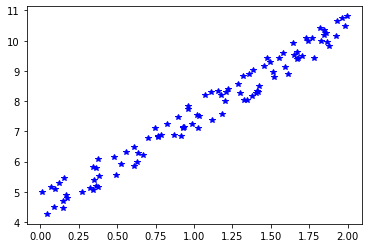

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = 2*np.random.rand(100,1)
y = 4+3*x+np.random.rand(100,1)
plt.plot(x,y,'b*')


In [2]:
x_b = np.c_[np.ones((100,1)), x]
theta_best = np.linalg.inv(x_b.T @ x_b)@ x_b.T @ y
theta_best

array([[4.42113888],
       [3.07823372]])

In [3]:
np.shape(x_b)

(100, 2)

In [4]:
np.shape(theta_best)

(2, 1)

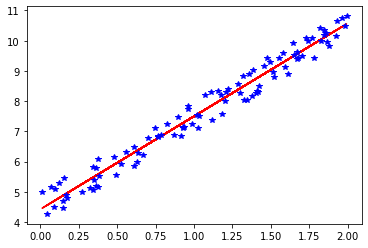

In [5]:
y_predict =x_b @ theta_best
plt.plot(x,y_predict,'r-')
plt.plot(x,y,'b*')

## Batch gradient descent

In [6]:
def batchgrd(eta,m=100,n_iterations=1000):
    theta = np.random.randn(2,1)
    for ii in range(n_iterations):
        gradient = 2/m*x_b.T@(x_b@theta-y)
        theta = theta-eta*gradient
    return theta
theta = np.ones((2,10))
for ii in range(10):
    theta[0:2,ii:ii+1] = batchgrd(0.1,100,ii)
theta

array([[ 2.59878899,  1.90399556,  2.95709114,  2.83852402,  2.8299471 ,
         2.90771502,  2.74344346,  3.67361506,  3.06025873,  4.15362049],
       [-2.22099434,  1.13774017,  2.32215755,  2.99669321,  3.8278403 ,
         3.98176675,  4.25055005,  3.59478269,  4.13008609,  3.27583875]])

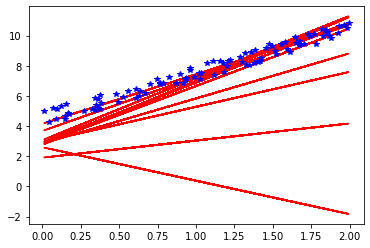

In [7]:
for ii in range(10):
    y_predict0 = x_b @ theta[0:2,ii:ii+1]
    plt.plot(x,y_predict0,'r-')
plt.plot(x,y,'b*')

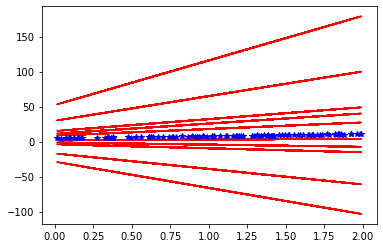

In [8]:
theta = np.ones((2,10))
for ii in range(10):
    theta[0:2,ii:ii+1] = batchgrd(0.5,100,ii)
for ii in range(10):
    y_predict0 = x_b @ theta[0:2,ii:ii+1]
    plt.plot(x,y_predict0,'r-')
plt.plot(x,y,'b*')

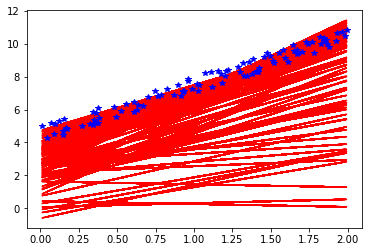

In [9]:
theta = np.ones((2,1000))
for ii in range(1000):
    theta[0:2,ii:ii+1] = batchgrd(0.01,100,ii)
for ii in range(100):
    y_predict0 = x_b @ theta[0:2,ii:ii+1]
    plt.plot(x,y_predict0,'r-')
plt.plot(x,y,'b*')

In [10]:
n_epochs = 50
t0,t1=5,50
theta = np.random.randn(2,1)
theta

array([[-0.42705729],
       [ 0.34571124]])

In [11]:
def learning_schedule(t):
    return t0/(t+t1)
m = 100
theta_set =[]
theta_set.append(theta)

In [12]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index =np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        err = xi@theta-yi
        gradients = 2*xi.T@err
        eta = learning_schedule(epoch*m+i)
        theta = theta-eta*gradients
        theta_set.append(theta)
theta

array([[4.43233288],
       [3.08212396]])

In [13]:
theta_set[0]

array([[-0.42705729],
       [ 0.34571124]])

In [14]:
x_b.shape

(100, 2)

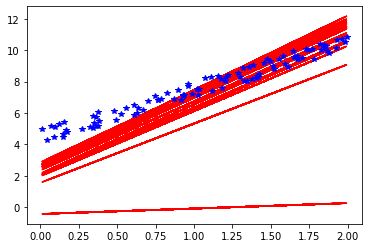

In [15]:
for ii in range(20):
    y_predict0 = x_b @ theta_set[ii]
    plt.plot(x,y_predict0,'r-')
plt.plot(x,y,'b*')

In [16]:
from sklearn.linear_model import SGDRegressor
sdg_reg = SGDRegressor(max_iter = 1000, tol = 1e-3,penalty = None, eta0 = 0.1)
sdg_reg.fit(x,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [17]:
sdg_reg.intercept_

array([4.40651039])

In [18]:
sdg_reg.coef_

array([3.11140255])

Polynomial Regression

In [19]:
m = 100
x = 6*np.random.rand(m,1)-3
y = 0.5*x**2 + x+2+np.random.randn(m,1)


In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2,include_bias = False)
x_poly = poly_features.fit_transform(x)

In [21]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.93682852]), array([[0.96551273, 0.50827281]]))

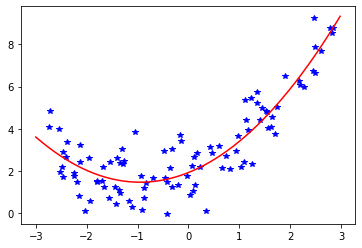

In [22]:
plt.plot(x,y,'b*')
x_raw = np.arange(-3,3,0.02)
y_raw = lin_reg.coef_[0][1]*x_raw**2+lin_reg.coef_[0][0]*x_raw+lin_reg.intercept_
plt.plot(x_raw,y_raw,'r-')

## Learning Curve
- Plots of the model performance on the training set and the validation set as a function of the training set size

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model,x,y):
    x_train,x_val,y_train,y_val = train_test_split(x,y,test_size = 0.2)
    train_errors,val_errors = [],[]
    for m in range(1,len(x_train)):
        model.fit(x_train[:m],y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='train')
    plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label='val')

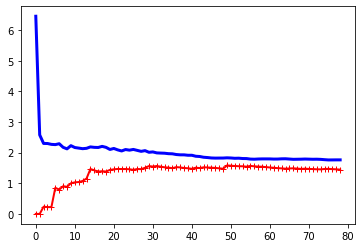

In [24]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,x,y)

- The abobe curve is typical learning curve of underfit. Both curves have reached a plateau; they are close and fairly high

In [25]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
    ("lin_reg",LinearRegression()),
])

(0.0, 3.0)

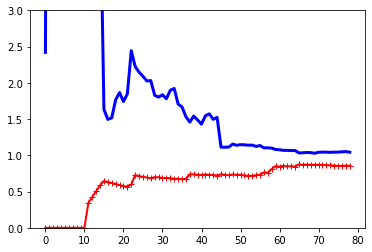

In [26]:
plot_learning_curves(polynomial_regression,x,y)
plt.ylim((0,3))

- Overfitting model
    - model perform better than on the validation set
    - larger training set could get two curves closer

## Regularized Models
### Ridge Regression

#### test data

In [27]:
np.random.seed(42)
m = 20
x = 3*np.random.rand(m,1)
y = 1+0.5*x+np.random.randn(m,1)/1.5
x_new = np.linspace(0,3,100).reshape(100,1)

In [28]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4,solver='auto')
ridge_reg.fit(x,y)
ridge_reg.predict([[1.5]])

array([[1.55237977]])

In [29]:
sgd_reg = SGDRegressor(alpha = 100,penalty='l2')
sgd_reg.fit(x,y.ravel())
sgd_reg.predict([[1.5]])

array([1.36637051])

In [31]:
def plotridge(x_train,y_train,x_val,alpha_in):
    ridge_reg = Ridge(alpha=alpha_in,solver='auto')
    ridge_reg.fit(x_train,y_train)
    y_predict = ridge_reg.predict(x_val)
    return y_predict

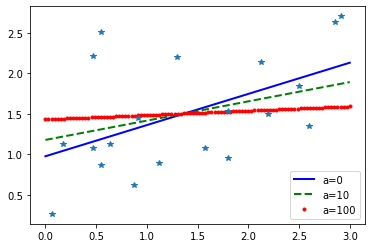

In [54]:
alpha = 0
y_predict1 = plotridge(x,y,x_new,alpha)
plt.plot(x_new,y_predict1,'b-',linewidth=2,label='a=%d' %alpha)
plt.legend()
alpha = 10
y_predict1 = plotridge(x,y,x_new,alpha)
plt.plot(x_new,y_predict1,'g--',linewidth=2,label='a=%d' %alpha)
plt.legend()
alpha = 100
y_predict1 = plotridge(x,y,x_new,alpha)
plt.plot(x_new,y_predict1,'r.',linewidth=2,label='a=%d' %alpha)
plt.legend()
plt.plot(x,y,'*')

In [51]:
from sklearn.preprocessing import StandardScaler
poly_regi_reg = Pipeline([
    ('polyfeatures',PolynomialFeatures(degree=10,include_bias=False)),
    ('scale',StandardScaler()),
    ('ridge_reg',Ridge(solver='auto'))
])
def plotpolyridge(x_train,y_train,x_val,alpha_in):
    poly_regi_reg.set_params(ridge_reg__alpha=alpha_in).fit(x_train,y_train)
    y_predict = poly_regi_reg.predict(x_val)
    return y_predict

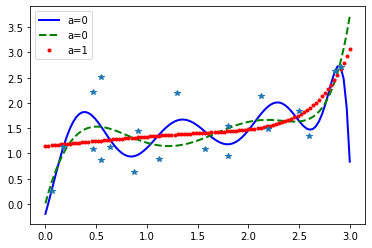

In [56]:
alpha = 0
y_predict1 = plotpolyridge(x,y,x_new,alpha)
plt.plot(x_new,y_predict1,'b-',linewidth=2,label='a=%d' %alpha)
plt.legend()
alpha = 1e-5
y_predict1 = plotpolyridge(x,y,x_new,alpha)
plt.plot(x_new,y_predict1,'g--',linewidth=2,label='a=%d' %alpha)
plt.legend()
alpha = 1
y_predict1 = plotpolyridge(x,y,x_new,alpha)
plt.plot(x_new,y_predict1,'r.',linewidth=2,label='a=%d' %alpha)
plt.legend()
plt.plot(x,y,'*')